STAT 2  (Cobbs)
Example 1.6 Doctors and Hospitals in metropolitan areas

* Sentences are taken out of the textbook verbatim. Code for the most part is my own. 

In [21]:
library(dplyr)
library(ggplot2)
MetroHealth83 <- read.csv("https://raw.githubusercontent.com/kleberperez1/RBridgeWeek2/master/MetroHealth83.csv")
MetroHealth83<- MetroHealth83 %>% select("City","NumMDs","NumHospitals")
nrow(MetroHealth83)  #83  rows

[1] 83

In [27]:
lm<-lm(formula=NumMDs~NumHospitals,data=MetroHealth83)
lm


Call:
lm(formula = NumMDs ~ NumHospitals, data = MetroHealth83)

Coefficients:
 (Intercept)  NumHospitals  
      -385.1         282.0  


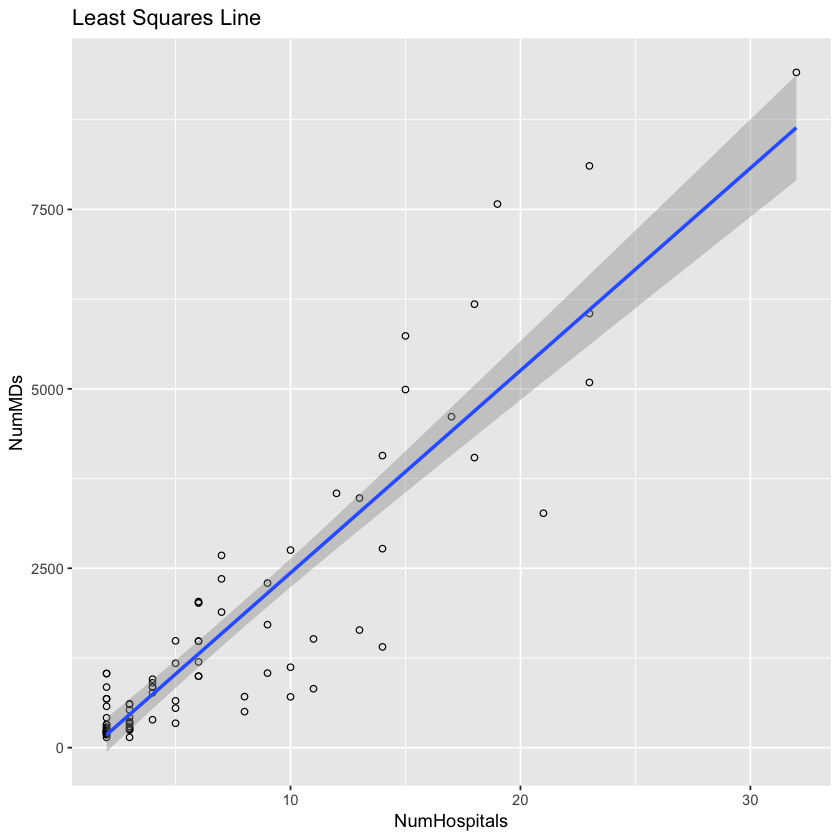

In [28]:
ggplot(MetroHealth83, aes(x=NumHospitals, y=NumMDs)) +geom_point(shape=1) + geom_smooth(method='lm')+ggtitle("Least Squares Line")

# Residual vs Fit Plot and QQ Plot


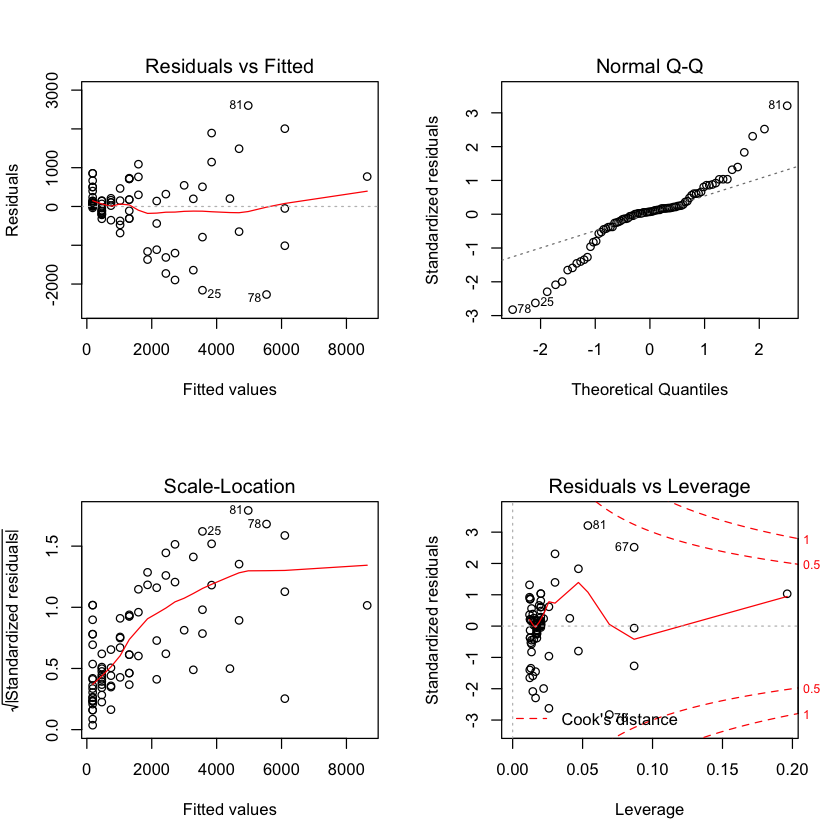

In [39]:
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(lm)

## For count data, such as the number of doctors whre the variability increases along with the magnitudes of the variable, a square transformation is often helpful. Use log transformation when we see strong curvature in the scatter plot. 

In [34]:
sqroot_NumMDs<-(MetroHealth83$NumMDs)^(1/2)
lm_new<-lm(formula=sqroot_NumMDs~NumHospitals,data=MetroHealth83)
lm_new


Call:
lm(formula = sqroot_NumMDs ~ NumHospitals, data = MetroHealth83)

Coefficients:
 (Intercept)  NumHospitals  
      14.033         2.915  


# Residual vs Fit Plot and QQ Plot



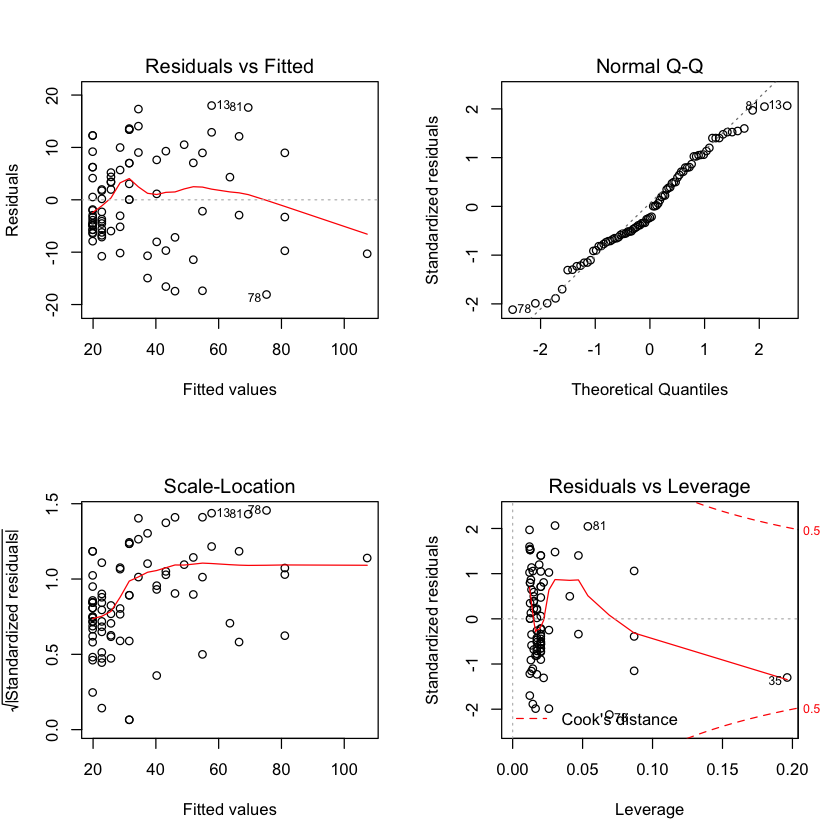

In [41]:
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(lm_new)

Prediction Equation: $(NumMDs)^{1/2} = 14.033+2.915(NumHospitals)$

If equal variance assumption holds, we should see parallel bands of data spread along the line. Although there might still be less variability for the smaller numbers of hospitals, the situation is much better than for the data on the original scale. 

We must remember that our transformed linear model is predicting $(NumMDs)^{1/2}$ so we must square its predicted values to obtain estimates for the actual number of doctors. 


Transforming linear model for linear model for square roots of the number od doctors back to the orginal scale
$NumMDs = (14.033+2.915NumHospitals) ^{2} $